In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.linear_model import Lasso 
from sklearn import metrics

In [ ]:
car_dataset=pd.read_csv('/content/drive/MyDrive/DATA/car data.csv')

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.shape

(301, 9)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


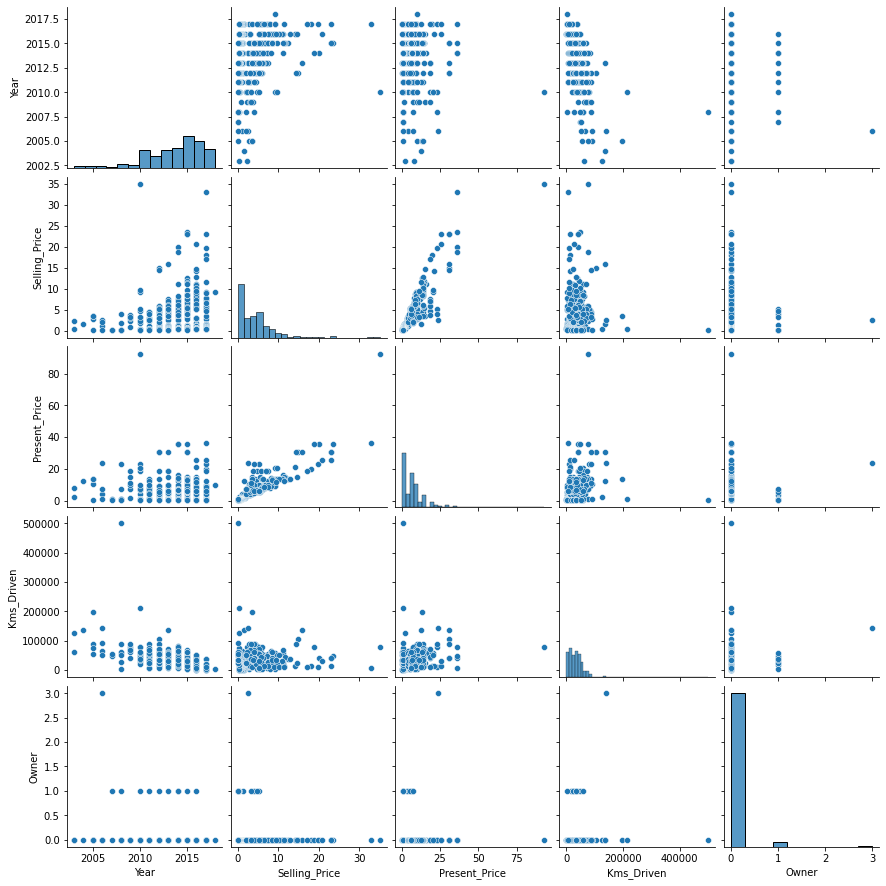

In [ ]:
sns.pairplot(car_dataset);

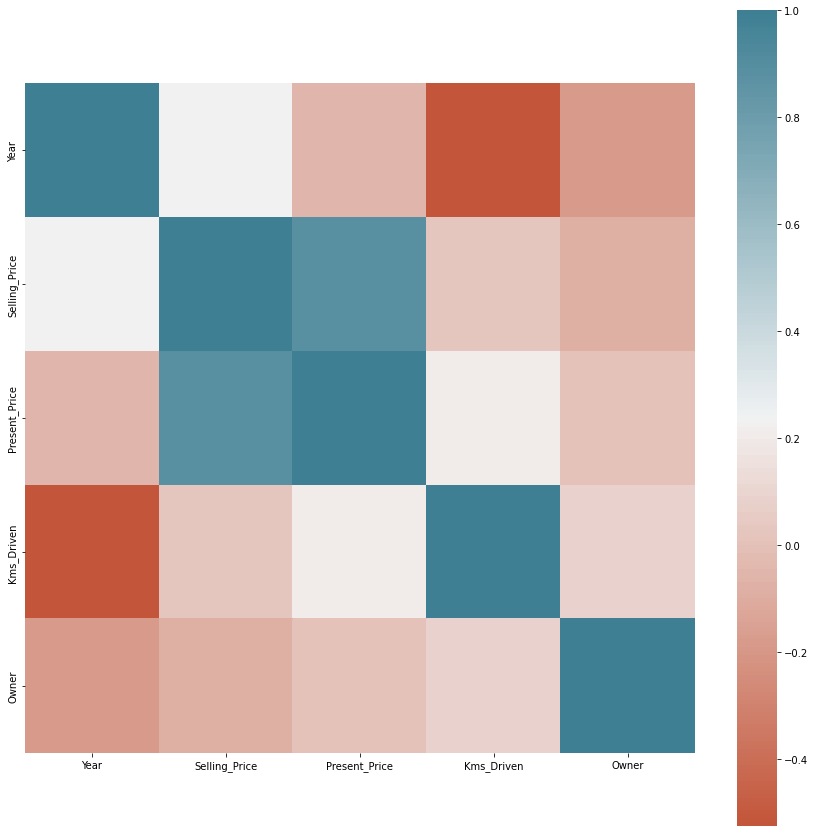

In [ ]:
#heatmap
plt.figure(figsize=(15,15))
sns.heatmap(
    car_dataset.corr(),
    cmap=sns.diverging_palette(20,220,n=200),
    square=True
)

In [ ]:
#checking the missing value
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#checking of distribution of categorial data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
# encoding  "Fuel_Type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# encoding  "Seller_Type" column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding "Transmission" column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X=car_dataset.drop('Selling_Price',axis=1)
y=car_dataset['Selling_Price']
print(X.shape)
print(y.shape)

(301, 8)
(301,)


Splitting data

In [ ]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting training and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

model train

1.LINEAR REGRESSION

In [ ]:
lin_reg_model=LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
training_data_prediction=lin_reg_model.predict(X_train)

In [ ]:
error_score=metrics.r2_score(Y_train,training_data_prediction) 
print("R squared Error:",error_score)

R squared Error: 0.8799451660493711


visualize

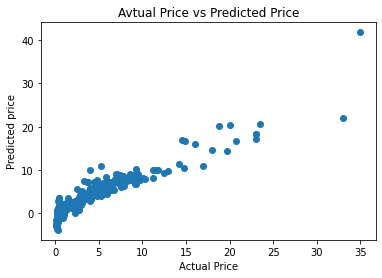

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Avtual Price vs Predicted Price")
plt.show()

In [ ]:
test_data_prediction=lin_reg_model.predict(X_test)

In [ ]:
# R squared error:-The Mean squared error (MSE) represents the error of the estimator or predictive model created based on the given set of observations in the sample. 
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8365766715027051


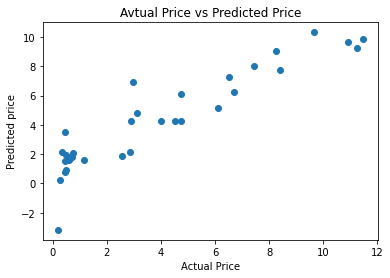

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Avtual Price vs Predicted Price")
plt.show()

Lasso Regression

In [ ]:
lass_reg_model=Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [ ]:
test_data_prediction=lass_reg_model.predict(X_test)

In [ ]:
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8799451660493711


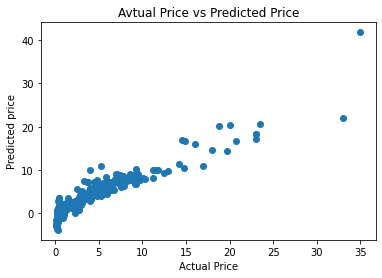

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Avtual Price vs Predicted Price")
plt.show()

In [ ]:
test_data_prediction=lass_reg_model.predict(X_test)

In [ ]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R Squared Error:',error_score)

R Squared Error: 0.8709167941173195


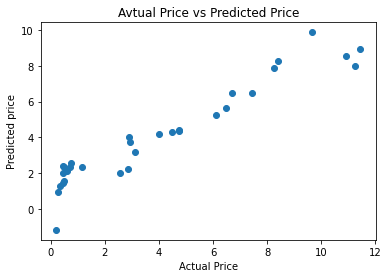

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Avtual Price vs Predicted Price")
plt.show()

Splitting Data

*Present_price*

In [ ]:
X=car_dataset.drop(['Car_Name','Present_Price'],axis=1)
Y=car_dataset['Present_Price']

In [ ]:
print(X)

     Year  Selling_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           3.35       27000          0            0             0   
1    2013           4.75       43000          1            0             0   
2    2017           7.25        6900          0            0             0   
3    2011           2.85        5200          0            0             0   
4    2014           4.60       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016           9.50       33988          1            0             0   
297  2015           4.00       60000          0            0             0   
298  2009           3.35       87934          0            0             0   
299  2017          11.50        9000          1            0             0   
300  2016           5.30        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 301, dtype: float64


Splitting training And testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Model a Train

1.Linear Regression

In [ ]:
lin_reg_model=LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
training_data_prediction=lin_reg_model.predict(X_train)

In [ ]:
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.845444532298379


Visualization

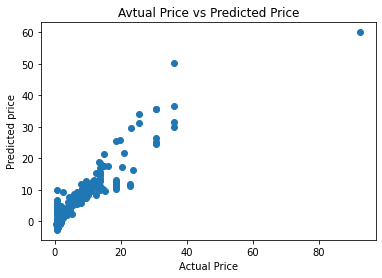

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Avtual Price vs Predicted Price")
plt.show()

In [ ]:
test_data_prediction=lin_reg_model.predict(X_test)

In [ ]:
# R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8499508730258827


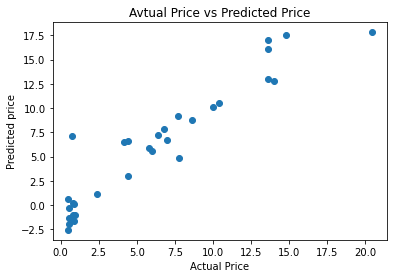

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Avtual Price vs Predicted Price")
plt.show()

Lasso Regression

In [ ]:
lass_reg_model=Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [ ]:
test_data_prediction=lass_reg_model.predict(X_test)

In [ ]:
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.845444532298379


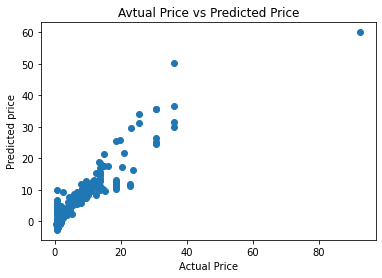

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Avtual Price vs Predicted Price")
plt.show()

In [ ]:
test_data_prediction=lass_reg_model.predict(X_test)

In [ ]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R Squared Error:',error_score)

R Squared Error: 0.9136042127515386


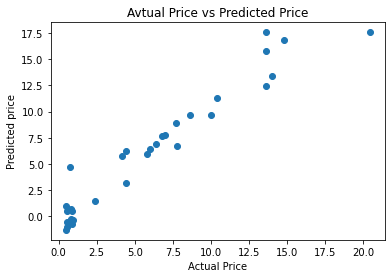

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Avtual Price vs Predicted Price")
plt.show()

Splitting Data


Kms_Driven

In [ ]:
X=car_dataset.drop(['Car_Name','Kms_Driven'],axis=1)
Y=car_dataset['Present_Price']

In [ ]:
print(X)

     Year  Selling_Price  Present_Price  Fuel_Type  Seller_Type  Transmission  \
0    2014           3.35           5.59          0            0             0   
1    2013           4.75           9.54          1            0             0   
2    2017           7.25           9.85          0            0             0   
3    2011           2.85           4.15          0            0             0   
4    2014           4.60           6.87          1            0             0   
..    ...            ...            ...        ...          ...           ...   
296  2016           9.50          11.60          1            0             0   
297  2015           4.00           5.90          0            0             0   
298  2009           3.35          11.00          0            0             0   
299  2017          11.50          12.50          1            0             0   
300  2016           5.30           5.90          0            0             0   

     Owner  
0        0  
1

In [ ]:
print(Y)

0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 301, dtype: float64


Splitting training and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Model a Train

1.Linear Regression

In [ ]:
lin_reg_model=LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
training_data_prediction=lin_reg_model.predict(X_train)

In [ ]:
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 1.0


visualization

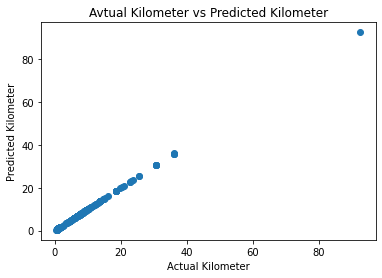

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Kilometer")
plt.ylabel("Predicted Kilometer")
plt.title("Avtual Kilometer vs Predicted Kilometer")
plt.show()

In [ ]:
test_data_prediction=lin_reg_model.predict(X_test)

In [ ]:
# R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error:",error_score)

R squared Error: 1.0


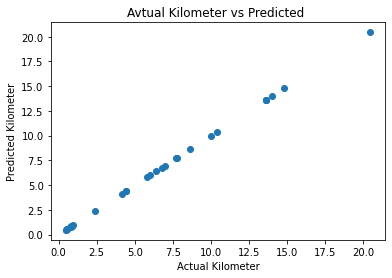

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Kilometer")
plt.ylabel("Predicted Kilometer")
plt.title("Avtual Kilometer vs Predicted ")
plt.show()

In [ ]:
lass_reg_model=Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [ ]:
test_data_prediction=lass_reg_model.predict(X_test)

In [ ]:
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 1.0


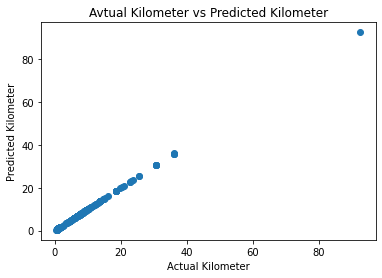

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Kilometer")
plt.ylabel("Predicted Kilometer")
plt.title("Avtual Kilometer vs Predicted Kilometer")
plt.show()

In [ ]:
test_data_prediction=lass_reg_model.predict(X_test)

In [ ]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R Squared Error:',error_score)

R Squared Error: 0.9998257076581067


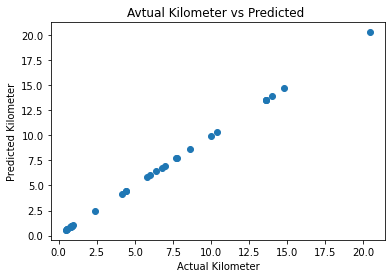

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Kilometer")
plt.ylabel("Predicted Kilometer")
plt.title("Avtual Kilometer vs Predicted ")
plt.show()

In [ ]:
print(car_dataset['Seller_Type'].unique())
print(car_dataset['Fuel_Type'].unique())
print(car_dataset['Transmission'].unique())
print(car_dataset['Owner'].unique())

[0 1]
[0 1 2]
[0 1]
[0 1 3]


In [ ]:
car_dataset.isnull().sum() #checking Missing VAlue

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [ ]:
final_dataset=car_dataset[['Car_Name','Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [ ]:
final_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
final_dataset['Current Year']=2020

In [ ]:
final_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,ritz,2014,3.35,5.59,27000,0,0,0,0,2020
1,sx4,2013,4.75,9.54,43000,1,0,0,0,2020
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,2020
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,2020
4,swift,2014,4.60,6.87,42450,1,0,0,0,2020


In [ ]:
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['Year']

In [ ]:
final_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,ritz,2014,3.35,5.59,27000,0,0,0,0,2020,6
1,sx4,2013,4.75,9.54,43000,1,0,0,0,2020,7
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,2020,3
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,2020,9
4,swift,2014,4.60,6.87,42450,1,0,0,0,2020,6


In [ ]:
final_dataset.drop(['no_year'],axis=1,inplace=True)

In [ ]:
final_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,ritz,2014,3.35,5.59,27000,0,0,0,0,2020
1,sx4,2013,4.75,9.54,43000,1,0,0,0,2020
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,2020
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,2020
4,swift,2014,4.60,6.87,42450,1,0,0,0,2020


In [ ]:
final_dataset=final_dataset.drop(['Current Year'],axis=1)

In [ ]:
final_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
final_dataset=final_dataset.drop(['Year'],axis=1)

In [ ]:
final_dataset.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,3.35,5.59,27000,0,0,0,0
1,sx4,4.75,9.54,43000,1,0,0,0
2,ciaz,7.25,9.85,6900,0,0,0,0
3,wagon r,2.85,4.15,5200,0,0,0,0
4,swift,4.60,6.87,42450,1,0,0,0


In [ ]:
final_dataset.drop(['Car_Name'],axis=1,inplace=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3.35,5.59,27000,0,0,0,0
1,4.75,9.54,43000,1,0,0,0
2,7.25,9.85,6900,0,0,0,0
3,2.85,4.15,5200,0,0,0,0
4,4.60,6.87,42450,1,0,0,0


In [ ]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Selling_Price,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


In [ ]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [ ]:
X['Owner'].unique()

array([0, 1, 3])

In [ ]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5.59,27000,0,0,0,0
1,9.54,43000,1,0,0,0
2,9.85,6900,0,0,0,0
3,4.15,5200,0,0,0,0
4,6.87,42450,1,0,0,0


In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[0.41825787 0.09856551 0.14958669 0.24770207 0.08442045 0.00146742]


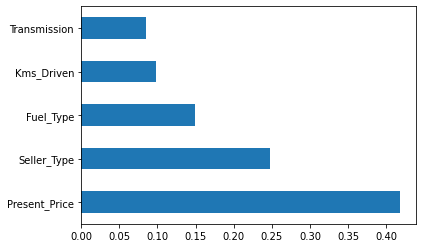

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor=RandomForestRegressor()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
rf_random.best_score_

-4.534959872885649

In [ ]:
predictions=rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


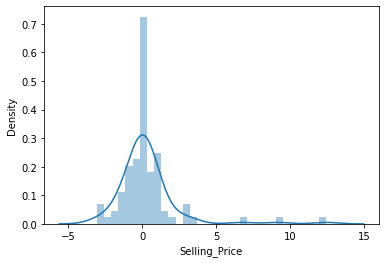

In [ ]:
sns.distplot(y_test-predictions)

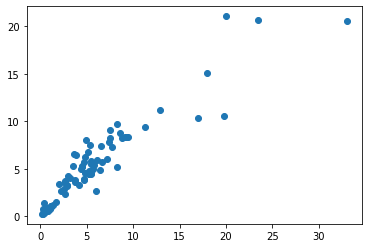

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0643284863945557
MSE: 4.353803376204002
RMSE: 2.0865769519008883


In [ ]:
X = final_dataset.drop('Fuel_Type', axis = 1)
y = final_dataset['Fuel_Type']
print(X.shape)
print(y.shape)

(301, 6)
(301,)


In [ ]:
print(X)

     Selling_Price  Present_Price  Kms_Driven  Seller_Type  Transmission  \
0             3.35           5.59       27000            0             0   
1             4.75           9.54       43000            0             0   
2             7.25           9.85        6900            0             0   
3             2.85           4.15        5200            0             0   
4             4.60           6.87       42450            0             0   
..             ...            ...         ...          ...           ...   
296           9.50          11.60       33988            0             0   
297           4.00           5.90       60000            0             0   
298           3.35          11.00       87934            0             0   
299          11.50          12.50        9000            0             0   
300           5.30           5.90        5464            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ..

In [ ]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
296    1
297    0
298    0
299    1
300    0
Name: Fuel_Type, Length: 301, dtype: int64


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
model.feature_importances_

array([0.33528149, 0.25618959, 0.27506376, 0.09406103, 0.03307078,
       0.00633335])

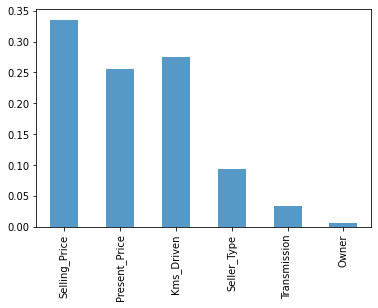

In [ ]:
pd.Series(model.feature_importances_, index=X.columns).plot(kind='bar',alpha=0.75, rot=90);

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.3907370837417493

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)

In [ ]:
cross_val_score(LinearRegression(), X,y,cv=cv)

array([ 0.39073708,  0.08406904, -0.12285135,  0.27617522,  0.26122215])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
def perfect_model(X, y):
    model_algo = {
      
      'Linear_Regression':{
          'model': LinearRegression(),
          'params': {
              'normalize': [True, False]
            }
        },

        'Decision_Tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse', 'mae'],
                'splitter': ['best', 'random'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        },

        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [x for x in range(20,150,20)],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10, 15, 100],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        }
    }
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in model_algo.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_iter=5)
        rs.fit(X_train,y_train)
        score.append({
          'model': algo_name,
          'best_score': rs.best_score_,
          'best_params': rs.best_params_
      })

    result = pd.DataFrame(score,columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result

In [ ]:
perfect_model(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated i

[{'normalize': True}, {'splitter': 'random', 'min_samples_leaf': 5, 'max_depth': 30, 'criterion': 'mse'}, {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 20}]


,model,best_score,best_params
0,Linear_Regression,0.245261,{'normalize': True}
1,Decision_Tree,0.257792,"{'splitter': 'random', 'min_samples_leaf': 5, ..."
2,Random_forest,0.346390,"{'n_estimators': 100, 'min_samples_split': 10,..."


In [ ]:
final_dec_model = DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae')
final_dec_model.fit(X_train,y_train)
final_dec_model.score(X_test,y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


0.13804347826086927

In [ ]:
final_rf_model = RandomForestRegressor(n_estimators=120,
      min_samples_split=2, min_samples_leaf=1,
       max_features='auto', max_depth=20)
final_rf_model.fit(X_train,y_train)
final_rf_model.score(X_test,y_test)

0.38268196457326875

In [ ]:
cross_val_score(DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae'), X,y,cv=cv)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

array([ 0.22644928, -0.39057751, -0.22      ,  0.22873563,  0.04039116])

In [ ]:
cross_val_score(RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20), X,y,cv=cv)

array([0.41527546, 0.44798579, 0.26903977, 0.22982631, 0.42092073])

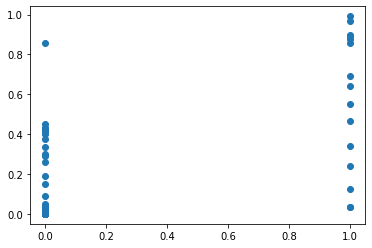

In [ ]:
predictions=final_rf_model.predict(X_test)
plt.scatter(y_test,predictions)

In [ ]:
X = final_dataset.drop('Seller_Type', axis = 1)
y = final_dataset['Seller_Type']
print(X.shape)
print(y.shape)

(301, 6)
(301,)


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
model.feature_importances_

array([0.46964536, 0.41648812, 0.03670226, 0.06198197, 0.00199422,
       0.01318806])

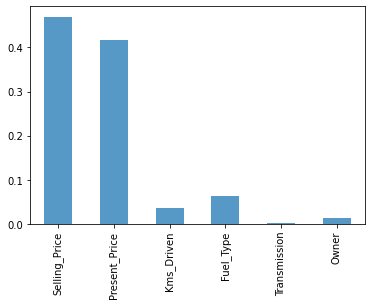

In [ ]:
pd.Series(model.feature_importances_, index=X.columns).plot(kind='bar',alpha=0.75, rot=90);

In [ ]:
final_rf_model = RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20)
final_rf_model.fit(X_train,y_train)
final_rf_model.score(X_test,y_test)

0.3975083534621575

In [ ]:
cross_val_score(DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae'), X,y,cv=cv)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

array([0.9235589 , 0.92890443, 0.72522523, 0.74386305, 0.84237726])

In [ ]:
cross_val_score(RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20), X,y,cv=cv)

array([0.93119239, 0.92169613, 0.82790799, 0.84080651, 0.81762283])

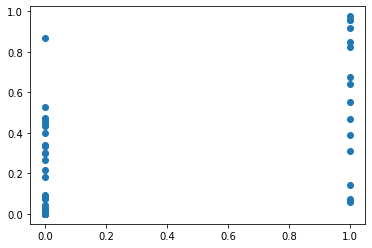

In [ ]:
predictions=final_rf_model.predict(X_test)
plt.scatter(y_test,predictions)

In [ ]:
X = final_dataset.drop('Transmission', axis = 1)
y = final_dataset['Transmission']
print(X.shape)
print(y.shape)


(301, 6)
(301,)


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
model.feature_importances_

array([0.31281661, 0.38122471, 0.260319  , 0.02931784, 0.00439348,
       0.01192836])

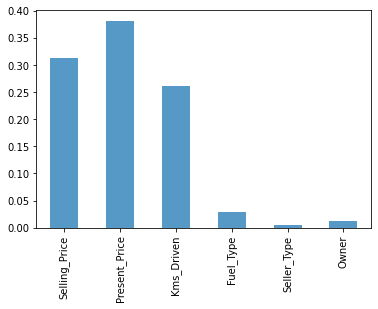

In [ ]:
pd.Series(model.feature_importances_, index=X.columns).plot(kind='bar',alpha=0.75, rot=90);

In [ ]:
final_rf_model = RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20)
final_rf_model.fit(X_train,y_train)
final_rf_model.score(X_test,y_test)

0.3732642914653782

In [ ]:
cross_val_score(DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae'), X,y,cv=cv)
cross_val_score(RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20), X,y,cv=cv)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

array([ 0.07145215,  0.31154143,  0.28543722, -0.24771444,  0.25819533])

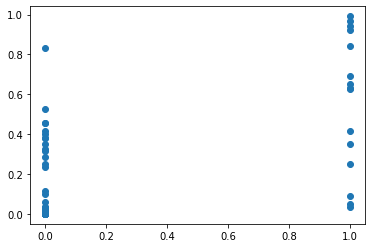

In [ ]:
predictions=final_rf_model.predict(X_test)
plt.scatter(y_test,predictions)